In [73]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


#Import data 
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read in csv files
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [3]:
#display mouse data
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#display results data
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#merge two dataframes by mouse ID
mouse_results_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#count the number of individual mice
mouse_count = len(mouse_results_df["Mouse ID"].unique())
mouse_count

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_results_df.loc[mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_df.loc[mouse_results_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_df = mouse_results_df.loc[mouse_results_df["Mouse ID"]!="g989"]
clean_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = clean_results_df["Mouse ID"].nunique()
mouse_count2

248

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = clean_results_df.groupby("Drug Regimen")
#regimen_group.count().head()

mean = regimen_group["Tumor Volume (mm3)"].mean() 
median = regimen_group["Tumor Volume (mm3)"].median()
variance = regimen_group["Tumor Volume (mm3)"].var()
standard_dev = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


summary2_df = regimen_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary2_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<AxesSubplot:xlabel='Drug Regimen'>

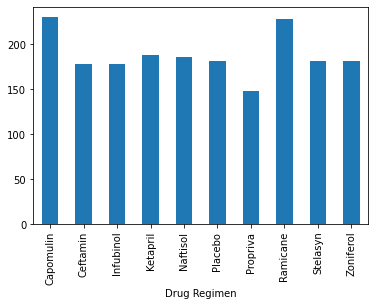

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_sum = regimen_group.count()["Mouse ID"]
drug_sum

drug_sum.plot.bar()
#ax = df.plot.bar(x='lab', y='val', rot=0)

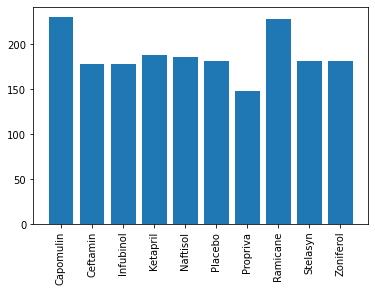

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_sum.index.values, drug_sum.values)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_sum = clean_results_df.groupby("Sex")
gender_sum = gender_sum.count()["Mouse ID"]
gender_sum

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

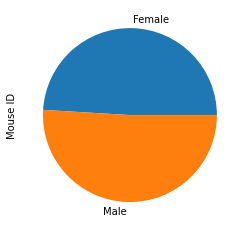

In [16]:
gender_sum.plot.pie()
#change headings to fix mouse ID
#add titles for everything and axis labels and legends

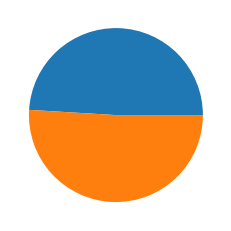

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_sum.values)
plt.show()

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



In [21]:
boxplot_df = clean_results_df.groupby("Mouse ID").last()[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
boxplot_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a262,Placebo,45,70.717621
a275,Ceftamin,45,62.999356
a366,Stelasyn,30,63.440686
...,...,...,...
z435,Propriva,10,48.710661
z578,Ramicane,45,30.638696
z581,Infubinol,45,62.754451


In [22]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
boxplot_df = boxplot_df.loc[boxplot_df["Drug Regimen"].isin(drugs)]
boxplot_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543
...,...,...,...
y769,Ceftamin,45,68.594745
y793,Capomulin,45,31.896238
y865,Ceftamin,45,64.729837


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

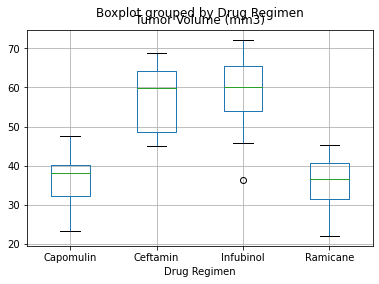

In [23]:
boxplot_df.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)")

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [48]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [49]:
for drug in drugs:
    filterdf = boxplot_df.loc[boxplot_df["Drug Regimen"]==drug]
    tumor_list = filterdf["Tumor Volume (mm3)"]
    quartiles = tumor_list.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    inter_q = upper_q - lower_q
    lowerbound = lower_q - (1.5*inter_q)
    upperbound = upper_q + (1.5*inter_q)
    outliers = tumor_list.loc[(tumor_list > upperbound)|(tumor_list < lowerbound)]
    print(lower_q, upper_q, inter_q, outliers)

32.37735684 40.1592203 7.781863460000004 Series([], Name: Tumor Volume (mm3), dtype: float64)
31.56046955 40.65900627 9.098536719999998 Series([], Name: Tumor Volume (mm3), dtype: float64)
54.04860769 65.52574285 11.477135160000003 Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
48.72207785 64.29983003 15.577752179999997 Series([], Name: Tumor Volume (mm3), dtype: float64)


In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [51]:
capomulin = ["Capomulin"]
Capomulin_data = clean_results_df.loc[clean_results_df["Drug Regimen"].isin(capomulin)]
Capomulin_data
# drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# boxplot_df = boxplot_df.loc[boxplot_df["Drug Regimen"].isin(drugs)]
# boxplot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [66]:
# mouse_weight_tumor = pd.DataFrame()
# mouse = Capomulin_data.groupby("Mouse ID")
# for name,group in mouse:
#     mouse_data = {"Mouse ID":name,"Mean Tumor Size":group["Tumor Volume (mm3)"].mean(), "Weight (g)":group["Weight (g)"].mean()}
#     mouse_weight_tumor = mouse_weight_tumor.append(mouse_data, ignore_index = True)

# mouse_weight_tumor

,Mean Tumor Size,Mouse ID,Weight (g)
0,41.963636,b128,22.0
1,40.083699,b742,21.0
2,36.505973,f966,17.0
3,41.990097,g288,19.0
4,44.613344,g316,22.0
5,44.805810,i557,24.0
6,39.141053,i738,20.0
7,44.465236,j119,23.0
8,43.216925,j246,21.0
9,44.434474,l509,21.0


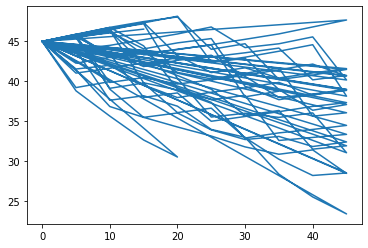

In [61]:

# m601_data = pd.DataFrame(capomulin_mice_df.loc[capomulin_mice_df['Mouse ID'] == 'm601' ])

x_axis = Capomulin_data["Timepoint"]
y_axis = Capomulin_data["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

In [62]:
Capomulin_weight = Capomulin_data.groupby("Mouse ID").last()[["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin_weight



# cap_weightavg = Capomulin_weight.agg({"Tumor Volume (mm3)": ["mean"]})
# cap_weightavg

,Drug Regimen,Weight (g),Tumor Volume (mm3)
Mouse ID,,,
b128,Capomulin,22,38.982878
b742,Capomulin,21,38.939633
f966,Capomulin,17,30.485985
g288,Capomulin,19,37.074024
g316,Capomulin,22,40.159220
i557,Capomulin,24,47.685963
i738,Capomulin,20,37.311846
j119,Capomulin,23,38.125164
j246,Capomulin,21,38.753265


In [68]:
mouse_weight_tumor = pd.DataFrame()
mouse = Capomulin_data.groupby("Mouse ID")
for name,group in mouse:
    mouse_data = {"Mouse ID":name,"Mean Tumor Size":group["Tumor Volume (mm3)"].mean(), "Weight (g)":group["Weight (g)"].mean()}
    mouse_weight_tumor = mouse_weight_tumor.append(mouse_data, ignore_index = True)

mouse_weight_tumor

,Mean Tumor Size,Mouse ID,Weight (g)
0,41.963636,b128,22.0
1,40.083699,b742,21.0
2,36.505973,f966,17.0
3,41.990097,g288,19.0
4,44.613344,g316,22.0
5,44.805810,i557,24.0
6,39.141053,i738,20.0
7,44.465236,j119,23.0
8,43.216925,j246,21.0
9,44.434474,l509,21.0


LinregressResult(slope=0.9544396890241051, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201326)
(0.8419363424694719, 1.3225722434712586e-07)


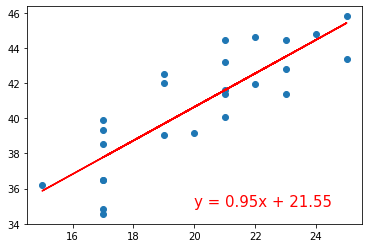

In [88]:
x_values = mouse_weight_tumor["Weight (g)"]
y_values = mouse_weight_tumor["Mean Tumor Size"]
plt.scatter(x_values, y_values)
plt.show
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(linregress(x_values, y_values))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")


correlation = st.pearsonr(mouse_weight_tumor["Weight (g)"],mouse_weight_tumor["Mean Tumor Size"])
print(correlation)

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen